# Método de Frobenius: caso 3

Angélica Angarita   
Jefferson Gómez   
Nicolás Toledo   

In [1]:
import numpy as np
from scipy import integrate
import scipy.special as sc
import matplotlib.pyplot as plt
import pandas as pd
import math 
import sympy as sym
from sympy import Integral, sin, sqrt
from sympy import symbols
from sympy import *
from sympy import singularities, Symbol, log
from sympy import Function

In [2]:
#Definición de algunas variables y listas
x, y, m, n, k = symbols('x y m n k')

a_n1, a_n2, a_n3, a_n4, a_n5, a_n6, a_n7, a_n8, a_n9 = symbols('a_n-1 a_n-2 a_n-3 a_n-4 a_n-5 a_n-6 a_n-7 a_n-8 a_n-9')
#a = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]
a = [a_n1, a_n2, a_n3, a_n4, a_n5, a_n6, a_n7, a_n8, a_n9]

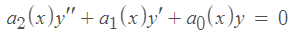

Elegir a2(x), a1(x) y a0(x):

In [3]:
#a2 = x**2 
#a1 = -x*(2-x)
#a0 = (2+x**2)

a2 = x**2 
a1 = x
a0 = (x**2-(1/4))


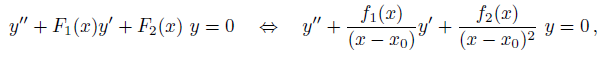

In [4]:
F1 = a1/a2
F2 = a0/a2

In [5]:
F1

3/x

In [6]:
F2

(x**2 - 0.25)/x**2

In [7]:
S1 = singularities(F1, x)
S2 = singularities(F2, x)

In [8]:
f1 = F1*x
f2 = F2*x**2

In [9]:
f1

3

In [10]:
f2

x**2 - 0.25

In [11]:
b = Poly(f1,x).all_coeffs()
c = Poly(f2,x).all_coeffs()

In [12]:
#Coeficientes c
c

[1.00000000000000, 0.0, -0.250000000000000]

In [13]:
#Coeficientes b
b

[3]

In [14]:
ceros = [0,0,0,0,0,0,0,0,0]

In [15]:
c = ceros + c
b = ceros + b

### Ecuación indicadora:

In [16]:
# Ecuación indicadora:
def u(n):
    return (m+n)*(m+n-1) + b[-1]*(m+n) + c[-1] 

In [17]:
u(0)

m*(m - 1) + 3*m - 0.25

Raíces:

In [18]:
roots = solve(u(0), m)
roots

[-2.11803398874989, 0.118033988749895]

Valor de N:

In [19]:
N = max(roots) - min(roots)
N = int(N)
N

2

In [20]:
max(roots) - min(roots)

2.23606797749979

### Verificando subcaso

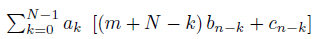

In [21]:
a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, an, ak = symbols('a_0 a_1 a_2 a_3 a_4 a_5 a_6 a_7 a_8 a_9 a_10 a_n a_k')

In [22]:
a_ = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]

In [23]:
sum = 0
for k in range(0, (N-1)+1, 1):
    sum = a_[k]*((m+N-k)*b[-1-N-k] + c[-1-N-k]) + sum

sum

1.0*a_0

A continuación se elige la raíz dependiendo del subcaso:

In [24]:
if sum == 0:
    m = min(roots)
    print("Subcaso 1, raíz menor ( m =",m,")")
else:
    m = max(roots)
    print("Subcaso 2, raíz mayor ( m =",m,")")
    

Subcaso 2, raíz mayor ( m = 0.118033988749895 )


### Desarrollo

#### Parte derecha del término x^(m+n) que se utilizará posteriormente para la ecuación de recurrencia:

In [25]:
sum = 0
for k in range(0, 6, 1):
    sum = a[k]*((m+ (n-1)-k)*b[-2-k] + c[-2-k]) + sum

sum

1.0*a_n-2

#### Coef x^(m+1), con el cual se encuentra la relación entre los primeros coeficientes de a:

Parte derecha del coef x^(m+1):

In [26]:
# Ni siquiera necesito el ciclo for, recordar quitarlo
summm = 0
for k in range(0, 1, 1):
    summm = a_[k]*((m+k)*b[-2-k] + c[-2-k]) + summm

summm

0

Parte izq + derecha = coef x^(m+1)

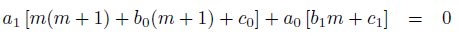

In [27]:
xm1 = a1*u(1) + summm

In [28]:
xm1

3.23606797749979*a_1

(Si xm1=0 es porque los coeficientes de a1, a2 = 0 (a1*[0] y a2*[0]) y entonces estos pueden tomar cualquier valor)

In [29]:
# Se resuelve para a1, encontrando la relación entre a1 y a0.
solve(xm1, a1)

[0.0]

In [30]:
print("a_1 =",solve(xm1, a1))

a_1 = [0.0]


### Ecuación de recurrencia:

In [31]:
recurrencia = an*u(n) + sum

In [32]:
recurrencia

a_n*(3*n + (n - 0.881966011250105)*(n + 0.118033988749895) + 0.104101966249685) + 1.0*a_n-2

### Cálculo de los coeficientes a_n utilizando la ecuación de recurrencia:

In [33]:
# Colocar coeficientes a0 y a1:
A0 = a0
A1 = a1
coefs_add = [A0, A1]
coefs_i = coefs_add + ceros

In [34]:
ni=2

In [35]:
bb = b.copy()
cc = c.copy()

bb.reverse()
cc.reverse()

In [36]:
# Cálculo de los coeficientes a_n
for n in range(ni, ni+4, 1):
    sum_num = 0
    for k in range(0, 8, 1):
        sum_num = coefs_i[k]*((m+k)*bb[n-k] + cc[n-k]) + sum_num
    
    recurr = an*u(n) + sum_num
    
    A = solve(recurr, an)
    
    coefs_add.append(A[0])
    coefs_add
    coefs_i = coefs_add + ceros
    coefs_i

In [37]:
coefs_add

[a_0,
 a_1,
 -0.118033988749895*a_0,
 -0.0636610018750174*a_1,
 0.00473190755680384*a_0,
 0.00175954681666806*a_1]

Primera solución:

In [38]:
y1 = (x**m)*(coefs_add[0]*x**0 + coefs_add[1]*x**1 + coefs_add[2]*x**2 + coefs_add[3]*x**3 + coefs_add[4]*x**4 + coefs_add[5]*x**5 )
y1

x**0.118033988749895*(0.00473190755680384*a_0*x**4 - 0.118033988749895*a_0*x**2 + a_0 + 0.00175954681666806*a_1*x**5 - 0.0636610018750174*a_1*x**3 + a_1*x)

La segunda solución tendría la forma:

In [39]:
m2, bi = symbols('m_2 b_i') 

In [40]:
from sympy.abc import i, k, m, n, x
from sympy import Sum, factorial, oo, IndexedBase, Function

In [41]:
y1*ln(x) + x**(m2) * Sum(bi*x**i, (i, 0, oo))

x**0.118033988749895*(0.00473190755680384*a_0*x**4 - 0.118033988749895*a_0*x**2 + a_0 + 0.00175954681666806*a_1*x**5 - 0.0636610018750174*a_1*x**3 + a_1*x)*log(x) + x**m_2*Sum(b_i*x**i, (i, 0, oo))